In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df1 = pd.read_csv("takehome_users.csv",encoding="ISO-8859-1")
df1.head(1)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0


In [47]:
df1.shape
df1.rename(columns={'object_id':'user_id'},inplace=True)

In [48]:
df2 = pd.read_csv("takehome_user_engagement.csv")

In [49]:
df2.shape
df2.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [50]:

merged_data = pd.merge(df1,df2,on="user_id",how="right")
merged_data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

In [51]:
merged_data.shape

(207917, 12)

In [52]:
merged_data.head(5)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1


In [53]:
merged_data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

In [54]:
merged_data['date'] = merged_data['time_stamp'].astype('datetime64')
merged_data['week'] = merged_data['date'].dt.isocalendar().week
merged_data['year'] = merged_data['date'].dt.isocalendar().year
merged_data['month'] = merged_data['date'].dt.month

In [55]:
groupby_week = merged_data.groupby(['user_id','week','month','year'])['visited'].count().reset_index()

In [56]:
groupby_week['adopted_user'] = groupby_week['visited'].apply(lambda x: 1 if x >= 3 else 0)

In [57]:
groupby_week.head()

,user_id,week,month,year,visited,adopted_user
0,1,17,4,2014,1,0
1,2,1,12,2014,1,0
2,2,2,1,2014,1,0
3,2,6,2,2014,3,1
4,2,7,2,2014,2,0


In [58]:
adopted_user = groupby_week.loc[groupby_week['visited'] >=3]
len(adopted_user)

32754

In [59]:
df3 = groupby_week[(groupby_week["visited"]>3)]
df3.head(2)

,user_id,week,month,year,visited,adopted_user
17,10,1,1,2014,4,1
19,10,2,1,2014,4,1


In [75]:
data = df3[["week","month","year","visited","adopted_user"]]
data.isnull().sum()


week            0
month           0
year            0
visited         0
adopted_user    0
dtype: int64

# ***Data Visualisation***

In [61]:
import seaborn as sns

In [62]:
# plt.figure(figsize=(12,8))
# sns.heatmap(merged_data.isnull(),annot=True)

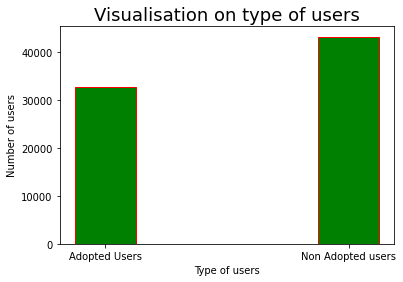

In [63]:
x = ['Adopted Users','Non Adopted users']
y = [(groupby_week.adopted_user.value_counts()[1]),(groupby_week.adopted_user.value_counts()[0])]
plt.bar(x,y,color="g",edgecolor="r",width=.25)

plt.xlabel("Type of users")
plt.ylabel("Number of users")
plt.title("Visualisation on type of users",fontsize=18)
plt.show()


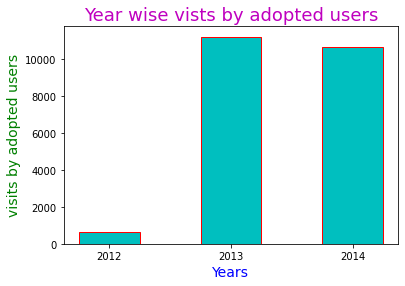

In [64]:
x = ['2012','2013','2014']
v= df3.year.value_counts()
y = [v[2012],v[2013],v[2014]]
plt.bar(x,y,color='c',edgecolor='r',width=0.5)

plt.xlabel("Years",color='b',fontsize=14)
plt.ylabel("visits by adopted users",color='g',fontsize=14)
plt.title("Year wise vists by adopted users",color='m',fontsize=18)
plt.show()

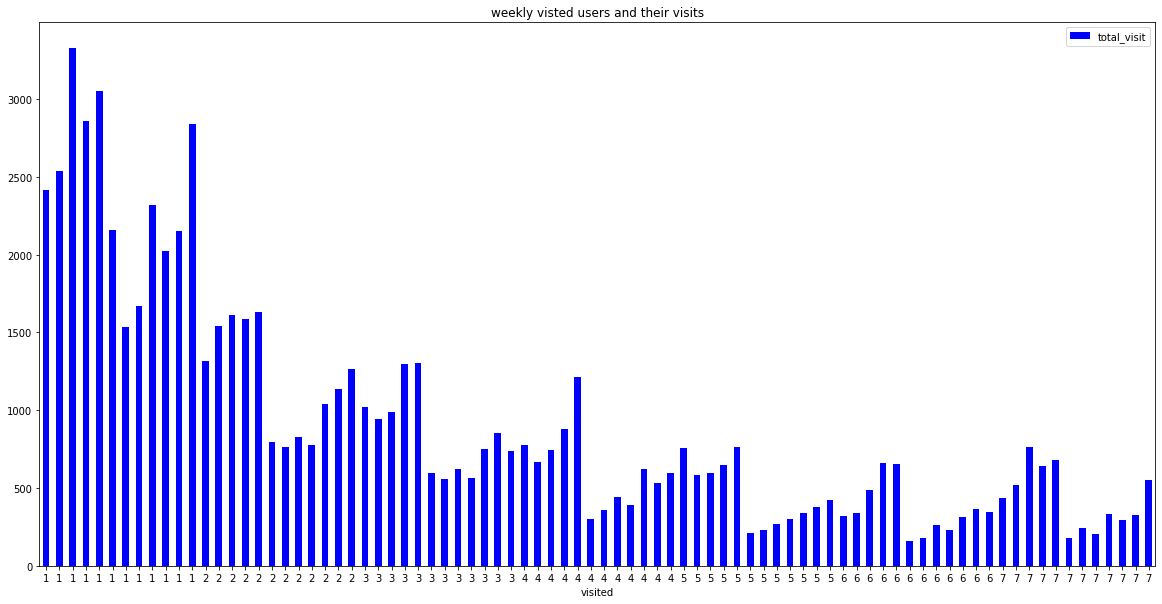

In [65]:
df4=groupby_week
df4= df4.groupby(['visited','month']).size()
df4 = df4.to_frame(name = 'total_visit').reset_index()
t= df4[df4['total_visit']>=3]
t.plot.bar(x='visited', y='total_visit', figsize=(20,10), title="weekly visted users and their visits",color='b')
plt.xticks(rotation= "horizontal")
plt.show()


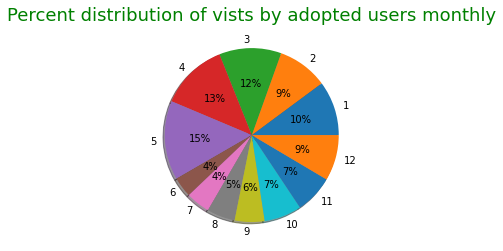

In [66]:
q = df3.groupby(['month']).size().values
p = df3.groupby(['month']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x, autopct='%1.0f%%',shadow=True)
plt.title("Percent distribution of vists by adopted users monthly", color = 'g',fontsize=18)
plt.show()

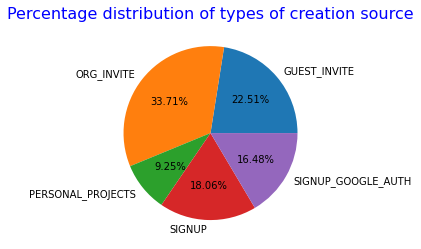

In [76]:
q = merged_data.groupby(['creation_source']).size().values
p = merged_data.groupby(['creation_source']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x,autopct='%1.2f%%')
plt.title("Percentage distribution of types of creation source", color = 'b',fontsize=16)
plt.show()